# Chargement du dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

## À propos de l'ensemble de données

- Cet ensemble de données contient les transactions effectuées par cartes de crédit en septembre 2013 par des titulaires de cartes européens.

- Ce jeu de données présente les transactions qui ont eu lieu en deux jours, où nous avons 492 fraudes sur 284 807 transactions.

- Le jeu de données est fortement déséquilibré, la classe positive (fraudes) représente 0,172% de toutes les transactions.

- Il ne contient que des variables d'entrée numériques qui sont le résultat d'une transformation PCA.

- Malheureusement, pour des raisons de confidentialité, nous ne pouvons pas fournir les caractéristiques originales et plus d'informations sur les données.

- Les caractéristiques V1, V2, ... V28 sont les composantes principales obtenues par l'ACP, les seules caractéristiques qui n'ont pas été transformées par l'ACP sont "Time" et "Amount".

- La caractéristique "Temps" contient les secondes écoulées entre chaque transaction et la première transaction de l'ensemble de données.

- La caractéristique "Montant" est le montant de la transaction, cette caractéristique peut être utilisée pour l'apprentissage sensible aux coûts dépendant de l'exemple.

- La caractéristique "Classe" est la variable de target et prend la valeur 1 en cas de fraude et 0 sinon.


In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Exploration des données

### Analyse de la forme:

- Identification de la target ou la variable à expliquer : **Class**
- Nombre de lignes et de colonnes : **284807, 31**
- Types de variables : **31 variables quantitatives**
- Identification des valeurs manquantes : **Notre base de données ne contient aucune donnée manquante**

### Analyse du fond:

- Visualisation de la target(Histogramme/Boxplot) : **1% de cas de fraude détecté (492/284315)**


### Analyse de la forme

In [4]:
df = data.copy()

In [5]:
df.shape

(284807, 31)

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a aucune valeur nulle dans notre dataset, cela va failiter notre analyse.

In [10]:
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [11]:
df.isna()
#df.isnull().values.any()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

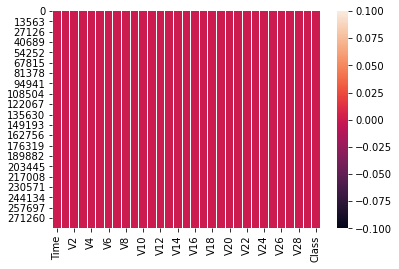

In [12]:
sns.heatmap(df.isna())

In [13]:
df.isna().sum()/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

### Analyse du fond

### Examen de la target

In [14]:
df['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

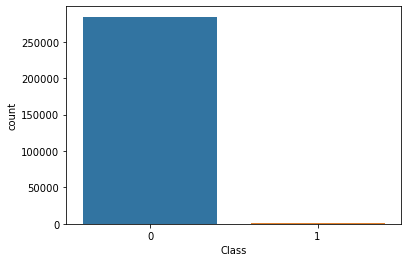

In [15]:
sns.countplot('Class', data = df)

In [16]:
print("Fraude")
print(df.Time[df.Class==1].describe())

Fraude
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [17]:
print("Pas Fraude")
print(df.Time[df.Class==0].describe())

Pas Fraude
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


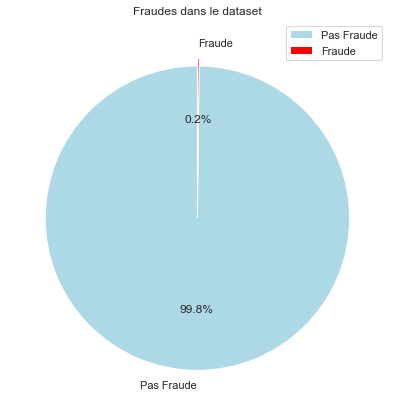

In [18]:
sns.set(style="whitegrid")
labels = ['Pas Fraude', 'Fraude']
sizes = df['Class'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode= explode, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Fraudes dans le dataset')
plt.legend()
plt.show()

#plt.figure(figsize=(7,7))

#df['Class'].value_counts().plot.pie(labels = ['Not Fraud', 'Fraud'])

#plt.title('Frauds in the dataset')
#plt.legend()
#plt.show()

D'après ce graphique, il semblerait que notre dataset est déséquilibré!!!

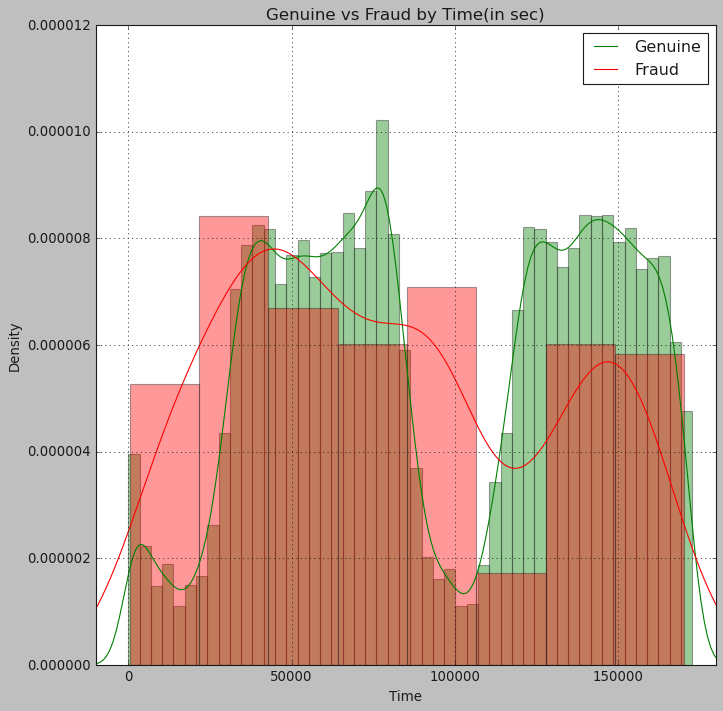

In [19]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(df[df['Class'] == 0]["Time"], color='green') # Genuine - green
sns.distplot(df[df['Class'] == 1]["Time"], color='red') # Fraud - Red

plt.title('Genuine vs Fraud by Time(in sec)', fontsize=15)
plt.xlim([-10000,180000])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine','Fraud'])
plt.show()

### Examen des variables continues

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<AxesSubplot:xlabel='Class', ylabel='count'>

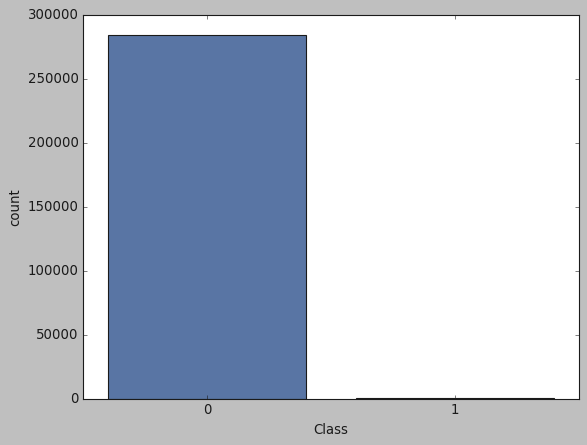

In [20]:
sns.countplot('Class', data = df)

Sur ce graphique, nous voyons que le nombre de transactions frauduleuses par rapport aux transactions non frauduleuses est presque nul. Il est donc très difficile pour nous de classer les données de test.

Text(0.5, 0, 'Amount')

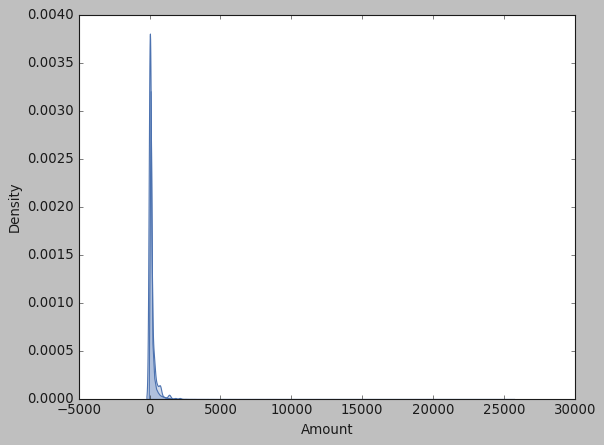

In [21]:
#sns.distplot(df['Amount'])
sns.kdeplot(df.Amount[df.Class == 0], label = 'Fraud', shade=True)
sns.kdeplot(df.Amount[df.Class == 1], label = 'NonFraud', shade=True)
plt.xlabel('Amount')

Nous voyons qu'il y a beaucoup plus de cas de petits montants de fraude que de cas vraiment importants.

Text(0.5, 0, 'Time')

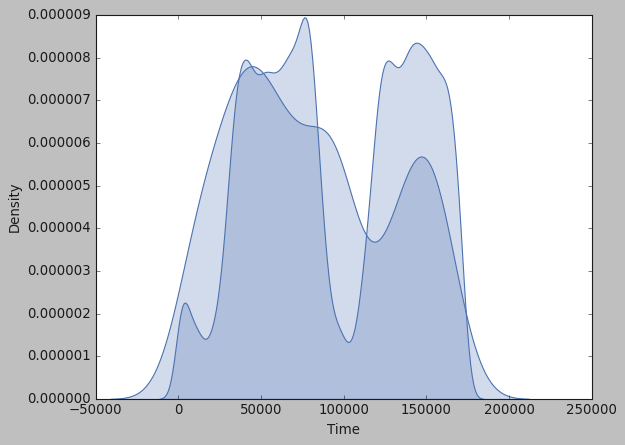

In [22]:
sns.kdeplot(df.Time[df.Class == 0], label = 'Fraud', shade=True)
sns.kdeplot(df.Time[df.Class == 1], label = 'NonFraud', shade=True)
plt.xlabel('Time')

Nous voyons que la variable **Time** n'a pas d'impact sur la fréquence de fraudes

### Relation entre variables

<Figure size 1200x1200 with 0 Axes>

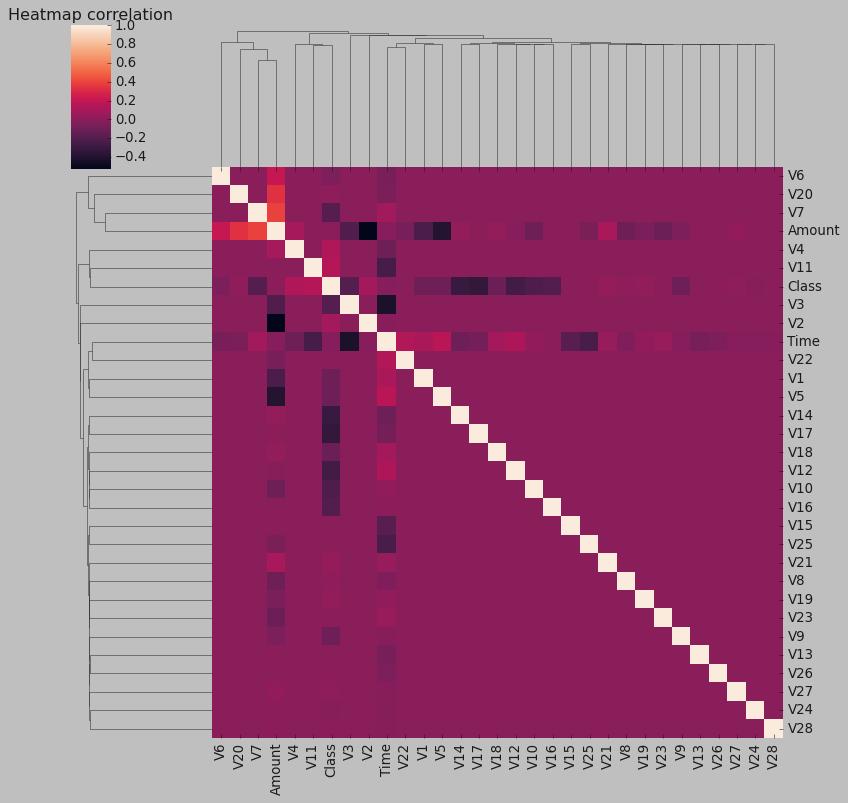

In [23]:
plt.figure(figsize=(15,15))
sns.clustermap(df.corr()) 

plt.title('Heatmap correlation')
plt.show()

Étant donné que nous travaillons avec des données obtenues après la mise en place d'un ACP, toutes nos variables ne sont point corrélées les unes aux autres.

## 2. Modélisation

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
#from xgboost import XGBRegressor

In [30]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Train set :', X_train.shape)
print('Test set :', X_test.shape)

Train set : (227845, 30)
Test set : (56962, 30)


### a. KNN

In [32]:
model1 = KNeighborsClassifier(n_neighbors=1) #on fixe le nombre des voisins à 1 pour le moment

model1.fit(X_train, y_train)
print('Train score', model1.score(X_train, y_train)) #on obtient un score de 100%

#Pour avoir une idée de la performance future de notre modèle, il faut le tester sur les données du Test_set
print('Test score', model1.score(X_test, y_test)) #On obtient un score de 99%

Train score 1.0
Test score 0.9980864435939749


### b. Régression Logistique

In [33]:
model2 = LogisticRegression(random_state=2)
logit = model2.fit(X_train, y_train)

In [34]:
#prédictions

ypred_logit = model2.predict(X_test) 

In [35]:
#scores

print("Accuracy Logit:",metrics.accuracy_score(y_test, ypred_logit))
print("Precision Logit:",metrics.precision_score(y_test, ypred_logit))
print("Recall Logit:",metrics.recall_score(y_test, ypred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, ypred_logit))

Accuracy Logit: 0.9989817773252344
Precision Logit: 0.7263157894736842
Recall Logit: 0.6831683168316832
F1 Score Logit: 0.7040816326530612


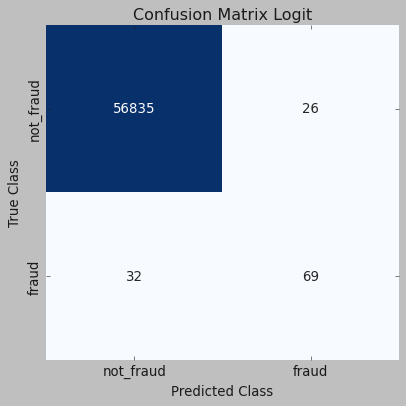

In [47]:
matrix_logit = confusion_matrix(y_test, ypred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [37]:
ypred_logit_proba = logit.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  ypred_logit_proba)
log_auc_logit = metrics.roc_auc_score(y_test, ypred_logit_proba)
print("AUC Logistic Regression :", log_auc_logit*100)

AUC Logistic Regression : 90.72560304692998


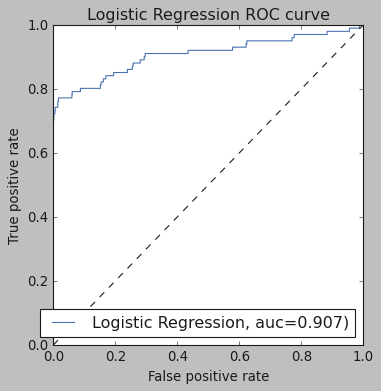

In [48]:
plt.figure(figsize=(5,5))
plt.plot(fpr_logit,tpr_logit, label="Logistic Regression, auc={:.3f})".format(log_auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

### c. Random Forest

In [39]:
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(X_train, y_train)

In [40]:
ypred_rf = model3.predict(X_test)

In [41]:
print("Accuracy RF:",metrics.accuracy_score(y_test, ypred_rf))
print("Precision RF:",metrics.precision_score(y_test, ypred_rf))
print("Recall RF:",metrics.recall_score(y_test, ypred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, ypred_rf))

Accuracy RF: 0.9995084442259752
Precision RF: 0.9195402298850575
Recall RF: 0.7920792079207921
F1 Score RF: 0.851063829787234


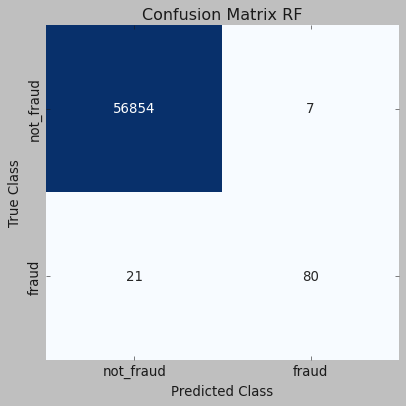

In [42]:
matrix_rf = confusion_matrix(y_test, ypred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [43]:
#AUC

ypred_rf_proba = model3.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  ypred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, ypred_rf_proba)
print("AUC Random Forest :", auc_rf*100)

AUC Random Forest : 95.90201814011971


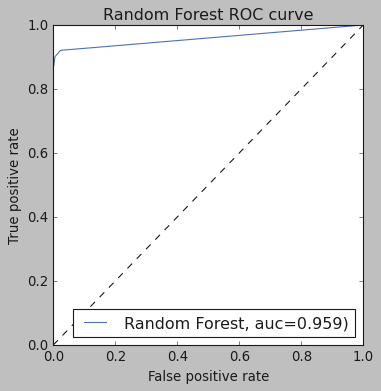

In [49]:
#La courbe ROC

plt.figure(figsize=(5,5))
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

### d. Isolation Forest

L'une des techniques les plus récentes pour détecter les anomalies est appelée "Isolation Forests". L'algorithme est basé sur le fait que les anomalies sont des points de données qui sont peu nombreux et différents. En raison de ces propriétés, les anomalies sont sensibles à un mécanisme appelé isolation.

Cette méthode est très utile et est fondamentalement différente de toutes les méthodes existantes. Elle introduit l'utilisation de l'isolement comme un moyen plus efficace et efficient de détecter les anomalies que les mesures de distance et de densité de base couramment utilisées. De plus, cette méthode est un algorithme à faible complexité linéaire en temps et à faible besoin en mémoire. Elle construit un modèle performant avec un petit nombre d'arbres en utilisant de petits sous-échantillons de taille fixe, quelle que soit la taille de l'ensemble de données.

Les méthodes d'apprentissage automatique typiques ont tendance à mieux fonctionner lorsque les modèles qu'elles tentent d'apprendre sont équilibrés, ce qui signifie que la même quantité de bons et de mauvais comportements est présente dans l'ensemble de données.

Fonctionnement des forêts d'isolement L'algorithme des forêts d'isolement isole les observations en sélectionnant aléatoirement une caractéristique, puis en choisissant aléatoirement une valeur de division entre les valeurs maximale et minimale de la caractéristique sélectionnée. L'argument logique est le suivant : il est plus facile d'isoler les observations d'anomalies car seules quelques conditions sont nécessaires pour séparer ces cas des observations normales. En revanche, l'isolement des observations normales nécessite davantage de conditions. Par conséquent, un score d'anomalie peut être calculé comme le nombre de conditions nécessaires pour séparer une observation donnée.

L'algorithme construit la séparation en créant d'abord des arbres d'isolement, ou arbres de décision aléatoires. Ensuite, le score est calculé comme la longueur du chemin pour isoler l'observation.

## Algorithme LOF (Local Outlier Factor)

L'algorithme LOF est une méthode de détection des aberrations non supervisée qui calcule l'écart de densité locale d'un point de données donné par rapport à ses voisins. Il considère comme aberrants les échantillons dont la densité est sensiblement inférieure à celle de leurs voisins.

Le nombre de voisins considérés (paramètre n_voisins) est typiquement choisi 1) supérieur au nombre minimum d'objets qu'un cluster doit contenir, de sorte que d'autres objets puissent être des aberrations locales par rapport à ce cluster, et 2) inférieur au nombre maximum d'objets proches qui peuvent potentiellement être des aberrations locales. En pratique, ces informations ne sont généralement pas disponibles, et prendre n_neighbors=20 semble bien fonctionner en général.

In [57]:
# On détermine le nombre des cas de fraude

fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


In [58]:
state = 1

# On défine les méthodes de détection des valeurs aberrantes.
classifiers = {
    # la contamination est le nombre d'aberrations que nous pensons qu'il y a
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    # nombre de voisins à prendre en compte, plus le pourcentage de valeurs aberrantes est élevé, plus ce nombre doit être élevé.
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [60]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
        
        
# reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    # calculate the number of errors
    n_errors = (y_pred != y).sum()
    
    # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest: 647
0.9977282861727416
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

